# week 13

## 5/30

들어가기 전에

텍스트 처리 에서는 단어 집합의 크기 만큼의 노드 수가 첫번째 layer로 입력된다. 

예를 들어 10000의 사이즈를 가진 단어 집합 크기에서 단어 한 개를 나타내면 1x10000 크기의 벡터가 입력으로 들어간다.

단어가 아닌 길이 100의 시퀀스(문장)을 입력, 훈련 시켜야 할 때는 1x10000의 벡터가 100개 즉, 100x10000이 들어간다고 생각.

그 것이 hidden layer인 128개의 노드로 들어가면, 100x10000, 10000x128 = 100x128 이 되는데, 128의 노드가 100개나 되는 것, 

그 것을 처리하기 위한 방법 중 하나로 100개의 평균을 구해 1x128의 모양으로 바꿔 주는 방법이 있다. -> GlobalAveragePooling1D layer 이용



### Import modules

In [1]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### load data 
- #### dataset (x: imdb article -> y: text type)
- #### word2idx dict (key: word; value: index)

num_words = input node의 개수, 10000개가 훨씬 넘는 단어에서 빈번하게 나오는 순으로 10000개만 인덱스, 나머지는 unknown 처리

word2idx 해당 단어가 몇 번인지 정의

x는 리뷰, y는 평가(긍정, 부정)

In [2]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)
word2idx = tensorflow.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [4]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
word2idx #each (unique) vocabulary and (unique) number are paired in dict

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

### modifiy word2idx dict (to reflect x_train, x_text)

In [7]:
word2idx = {k:v+3 for k, v in word2idx.items()}
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2
word2idx['<UNUSED>'] = 3

### create idx2word: inverse of word2idx

In [8]:
idx2word = {v:k for k, v in word2idx.items()}

### padding x_train, x_test

<PAD>라는 값을 이용하여 padding을 채워라

In [9]:
x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

총 256개의 숫자가 0-9999 안에서 분포 이룸, 각 숫자가 10000개의 길이의 one-hot coding이 되는 것

256개의 숫자가 10000개씩 256x10000으로 바꿔 주는 것이 임베딩

hidden layer = 256x10000 x 10000x128 = 256x128 -> 평균 작업 128번, 한 번당 256개를 평균(1x128 layer가 256겹 쌓아 있는 것)

In [18]:
x_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

### create model

embedding의 input으로는 256x1, 이것을 256x10000으로 만들어 주는 것이 embedding layer 의 역할 

hidden layer는 1차월 벡터, 즉 평균 구해서 256x128을 1x128로 만들어 주어야 함

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [12]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


### train model

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 16750 samples, validate on 8250 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16750/16750 [==============================] - 16s 926us/sample - loss: 0.6570 - acc: 0.7091 - val_loss: 0.5908 - val_acc: 0.7840
Epoch 2/10
16750/16750 [==============================] - 15s 906us/sample - loss: 0.5091 - acc: 0.8271 - val_loss: 0.4480 - val_acc: 0.8375
Epoch 3/10
16750/16750 [==============================] - 15s 921us/sample - loss: 0.3894 - acc: 0.8687 - val_loss: 0.3707 - val_acc: 0.8618
Epoch 4/10
16750/16750 [==============================] - 15s 911us/sample - loss: 0.3232 - acc: 0.8863 - val_loss: 0.3311 - val_acc: 0.8735
Epoch 5/10
16750/16750 [==============================] - 15s 915us/sample - loss: 0.2822 - acc: 0.9011 - val_loss: 0.3079 - val_acc: 0.8804
Epoch 6/10
16750/16750 [==============================] - 15s 874us/sample - loss: 0.2527 - acc: 0.9115 - val_loss: 0.2941 - val_acc: 0.8845
Epoch 7/10
16750/16750 [==============================] -

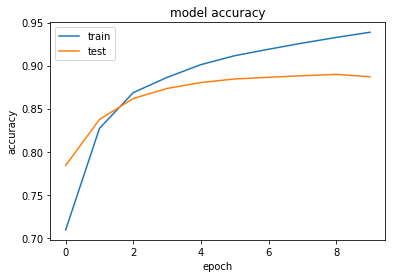

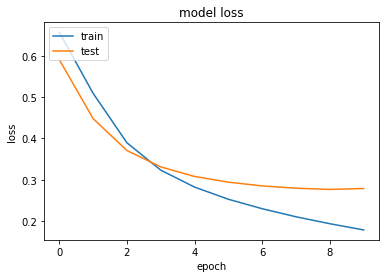

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### test model

In [16]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 75us/sample - loss: 0.2910 - acc: 0.8802


[0.29099566100120544, 0.88024]

### inference

In [17]:
testID = 100
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out)

<START> a quick glance at the premise of this film would seem to indicate just another dumb <UNK> <UNK> <UNK> slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread <UNK> tension amidst a lovely <UNK> backdrop these feelings are further <UNK> by a cast of realistically likable characters and <UNK> that are more amoral than cardboard <UNK> of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' <UNK> came from <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

In [ ]:
x_test[100]

-----------------------------------

## excercise

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [2]:
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']

In [10]:
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[1, 35], [28, 35], [8, 8], [20, 35], [31], [1], [26, 8], [12, 28], [26, 35], [13, 11, 35, 44]]


In [4]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 1 35  0  0]
 [28 35  0  0]
 [ 8  8  0  0]
 [20 35  0  0]
 [31  0  0  0]
 [ 1  0  0  0]
 [26  8  0  0]
 [12 28  0  0]
 [26 35  0  0]
 [13 11 35 44]]


In [5]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [7]:
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] - 0s 227us/step - loss: 0.6331 - acc: 0.9000
Epoch 2/50
10/10 [==============================] - 0s 318us/step - loss: 0.6316 - acc: 0.9000
Epoch 3/50
10/10 [==============================] - 0s 248us/step - loss: 0.6300 - acc: 0.9000
Epoch 4/50
10/10 [==============================] - 0s 266us/step - loss: 0.6284 - acc: 0.9000
Epoch 5/50
10/10 [==============================] - 0s 222us/step - loss: 0.6268 - acc: 0.9000
Epoch 6/50
10/10 [==============================] - 0s 448us/step - loss: 0.6252 - acc: 0.9000
Epoch 7/50
10/10 [==============================] - 0s 258us/step - loss: 0.6236 - acc: 0.9000
Epoch 8/50
10/10 [==============================] - 0s 265us/step - loss: 0.6220 - acc: 0.9000
Epoch 9/50
10/10 [==============================] - 0s 342us/step - loss: 0.6204 - acc: 0.9000
Epoch 10/50
10/10 [==============================] - 0s 351us/step - loss: 0.6187 - acc: 0.9000
Epoch 11/50
10/10 [==============================

In [12]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000
